<a href="https://colab.research.google.com/github/elliemmiller/datascience/blob/main/ImageProcessingwithScikitImageipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Image Processing with Scikit Image**

Produced by: Ellie Miller

In this assignment, we are recreating image samples we provide using different tools in the Scikit package. My images are stored in a folder (in Github) called 'Scikit Images'.

In [6]:
# Install necessary libraries (if not already installed)
!pip install scikit-image matplotlib numpy

# Import libraries
import numpy as np
import imageio
import matplotlib.pyplot as plt
from skimage import io, color, filters, segmentation, feature, morphology, restoration
from google.colab import files  # For file uploads
import cv2  # OpenCV for additional image handling
from skimage import io
from skimage.transform import pyramid_gaussian, pyramid_laplacian
from skimage.color import rgb2hsv


In [7]:
# Display images side by side
def show_images(images, titles=None, cmap='gray'):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for ax, img, title in zip(axes, images, titles if titles else [''] * len(images)):
        ax.imshow(img, cmap=cmap)
        ax.set_title(title)
        ax.axis('off')
    plt.show()

**Load Images**

In [8]:
# Function to display images
def show_images(images, titles):
    """Display multiple images in a row."""
    fig, axes = plt.subplots(1, len(images), figsize=(10, 5))
    if len(images) == 1:
        axes = [axes]  # Make it iterable for a single image
    for ax, img, title in zip(axes, images, titles):
        ax.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
        ax.set_title(title)
        ax.axis("off")
    plt.show()

<ipython-input-9-c9d33e0b1feb>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  cavesaveimage = imageio.imread(image_url)  # Load image


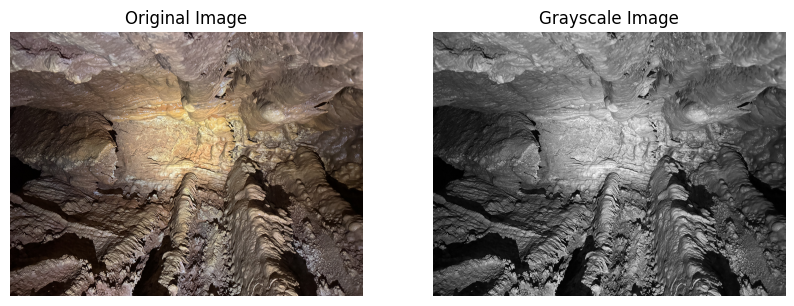

In [9]:
# Read image from GitHub raw URL
image_url = "https://raw.githubusercontent.com/elliemmiller/datascience/main/Photos/cave.jpeg"
cavesaveimage = imageio.imread(image_url)  # Load image

# Convert to grayscale
cave_image_gray = color.rgb2gray(cavesaveimage)

# Show Original and Grayscale Images
show_images([cavesaveimage, cave_image_gray], ["Original Image", "Grayscale Image"])

Image source: I took this photo in Cave of the Winds in Colorado Springs, Colorado.

<ipython-input-10-7cd849d28b39>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  icesaveimage = imageio.imread(image_url)  # Load image


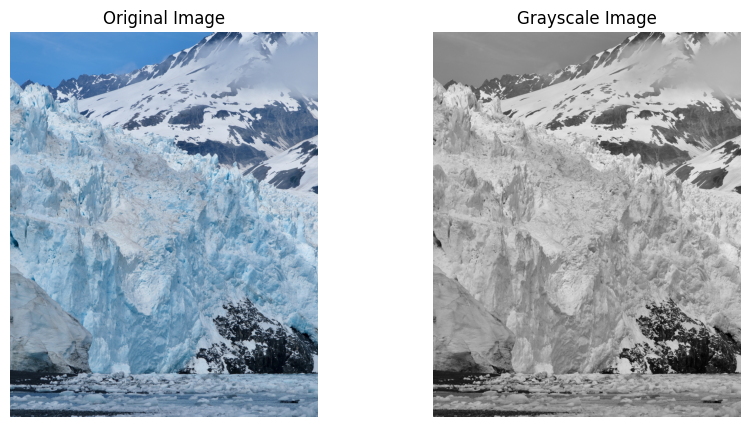

In [10]:
# Upload Image 2

# Read image from GitHub raw URL
image_url = "https://raw.githubusercontent.com/elliemmiller/datascience/main/Photos/ice.jpg"
icesaveimage = imageio.imread(image_url)  # Load image

# Convert to grayscale
ice_image_gray = color.rgb2gray(icesaveimage)

# Show Original and Grayscale Images
show_images([icesaveimage, ice_image_gray], ["Original Image", "Grayscale Image"])

Image source: I took this photo in Kenai Fjords National Park in Alaska.

<ipython-input-13-ffc54a43d06b>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  alaskasaveimage = imageio.imread(image_url)  # Load image


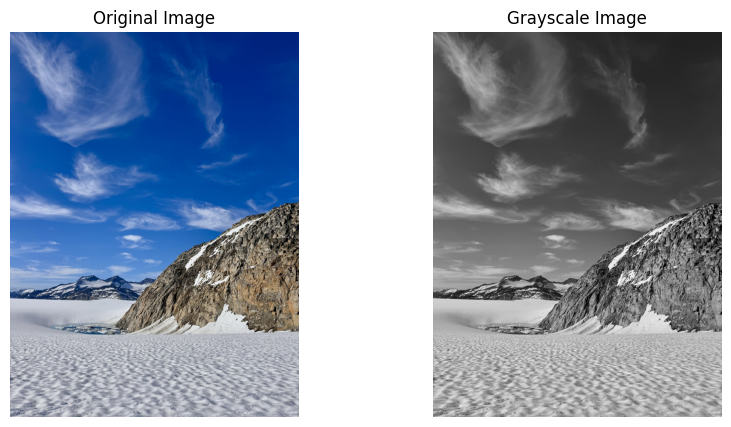

In [13]:
# Upload Image 3

# Read image from GitHub raw URL
image_url = "https://raw.githubusercontent.com/elliemmiller/datascience/main/Photos/outcropalaska.jpeg"
alaskasaveimage = imageio.imread(image_url)  # Load image

# Convert to grayscale
alaska_image_gray = color.rgb2gray(alaskasaveimage)

# Show Original and Grayscale Images
show_images([alaskasaveimage, alaska_image_gray], ["Original Image", "Grayscale Image"])

Image source: I took this photo on the Juneau Icefield in Juneau, Alaska.

<ipython-input-15-d79f5d031190>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  icelandsaveimage = imageio.imread(image_url)  # Load image


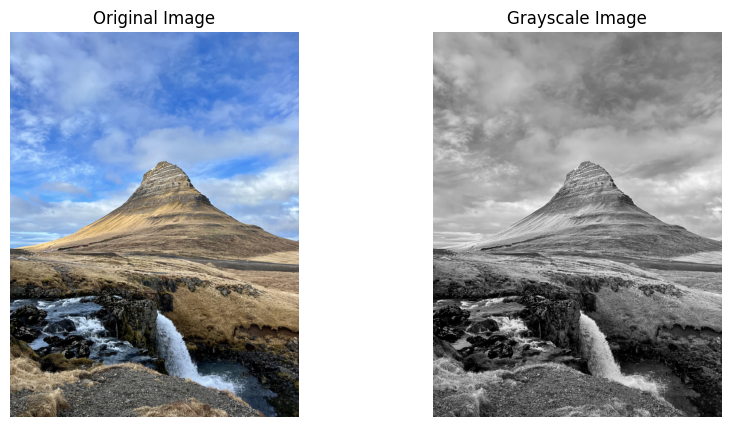

In [15]:
# Upload Image 4

# Read image from GitHub raw URL
image_url = "https://raw.githubusercontent.com/elliemmiller/datascience/main/Photos/outcropiceland.jpeg"
icelandsaveimage = imageio.imread(image_url)  # Load image

# Convert to grayscale
iceland_image_gray = color.rgb2gray(icelandsaveimage)

# Show Original and Grayscale Images
show_images([icelandsaveimage, iceland_image_gray], ["Original Image", "Grayscale Image"])

Image source: I took this photo on the Snaefellsnes Peninsula in Iceland.

<ipython-input-17-49b9d9ca7f98>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  lakesaveimage = imageio.imread(image_url)  # Load image


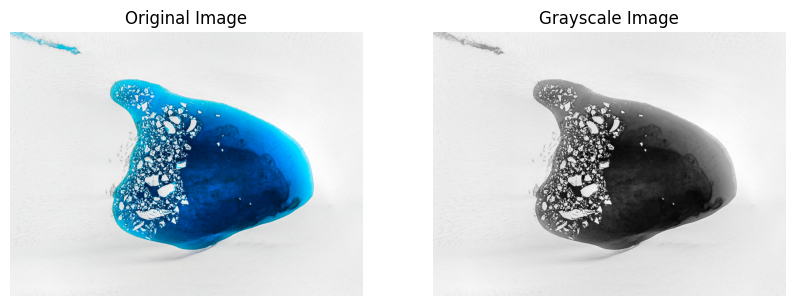

In [17]:
# Upload Image 5

# Read image from GitHub raw URL
image_url = "https://raw.githubusercontent.com/elliemmiller/datascience/main/Photos/supraglaciallake.jpg"
lakesaveimage = imageio.imread(image_url)  # Load image

# Convert to grayscale
lake_image_gray = color.rgb2gray(lakesaveimage)

# Show Original and Grayscale Images
show_images([lakesaveimage, lake_image_gray], ["Original Image", "Grayscale Image"])

Image source: This photo was taken by Andrew Opila on the Juneau Icefield in Juneau, Alaska.

**Example 1: RGB to HSV**

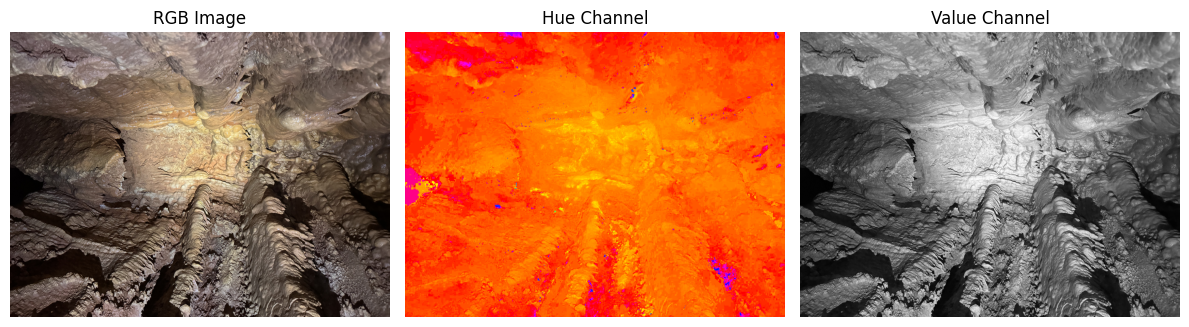

In [18]:
# Load the image
rgb_img = cavesaveimage  # cavesaveimage is already the loaded image data

# Convert RGB to HSV
hsv_img = rgb2hsv(rgb_img)

# Extract Hue and Value channels
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]

# Display RGB, Hue, and Value Channels

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(12, 4))

ax0.imshow(rgb_img)
ax0.set_title("RGB Image", fontsize=12)
ax0.axis('off')

ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue Channel", fontsize=12)
ax1.axis('off')

ax2.imshow(value_img, cmap='gray')
ax2.set_title("Value Channel", fontsize=12)
ax2.axis('off')

plt.tight_layout()
plt.show()


This example was chosen to illustrate the decomposition of an RGB image into its Hue and Value components, which is particularly useful in image processing and analysis. By implementing this transformation, I gained insight into how the hue channel captures the dominant color variations, while the value channel highlights the intensity and texture of the scene. This approach can be valuable for feature extraction, especially in applications involving geological or speleological studies where surface texture and mineral composition are of interest.

**Example 2: Canny Edge Detector**

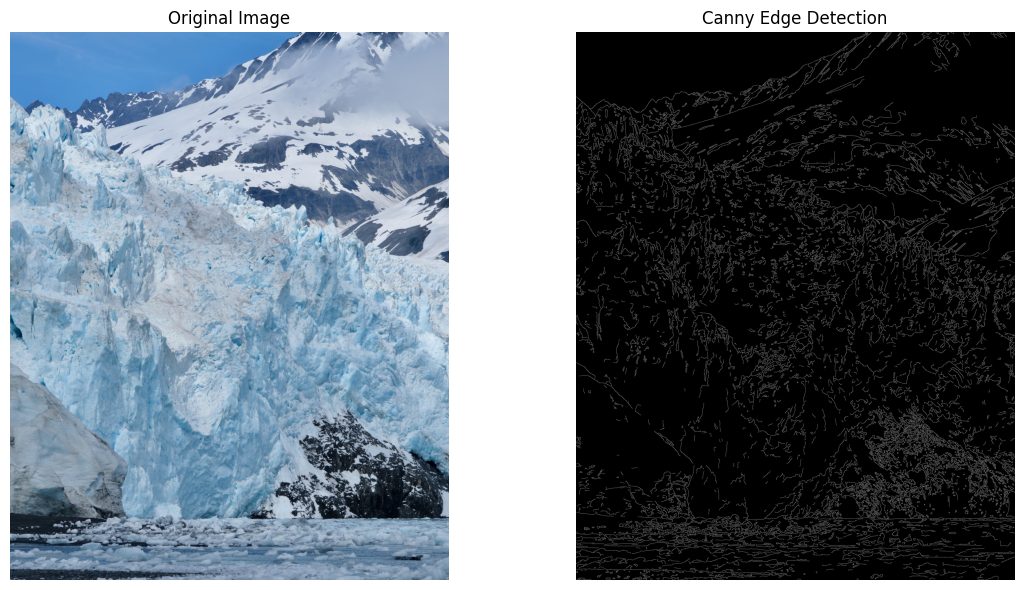

In [19]:
# Load the image
rgb_img = icesaveimage
gray_img = color.rgb2gray(rgb_img)  # Convert to grayscale

# Apply Canny Edge Detection
edges = feature.canny(gray_img, sigma=2)  # Adjust sigma for sensitivity

# Display Original and Edge-detected Images
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 6))

ax0.imshow(rgb_img)
ax0.set_title("Original Image", fontsize=12)
ax0.axis('off')

ax1.imshow(edges, cmap='gray')
ax1.set_title("Canny Edge Detection", fontsize=12)
ax1.axis('off')

plt.tight_layout()
plt.show()

This example was chosen to demonstrate the application of Canny edge detection on a glacier landscape, highlighting the importance of edge-based analysis in remote sensing and glaciological studies. Implementing this technique helped reveal the structural features of the ice, such as crevasses and surface texture variations, which are crucial for understanding ice dynamics and changes over time. The Canny edge detection method effectively captures the boundaries between different features, making it useful for automated glacier monitoring and morphological assessments.

**Example 3: Removing small objects in grayscale images with a top hat filter**

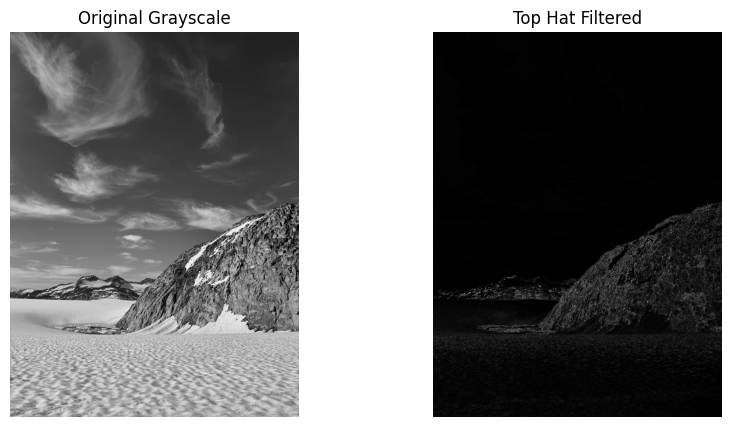

In [20]:
# Load the image
image = alaska_image_gray

# Import the necessary function from skimage.morphology
from skimage.morphology import disk, white_tophat

# Apply a top hat filter to remove small objects
selem = disk(5)  # Adjust the disk size as needed
# Use white_tophat instead of filters.rank.tophat
tophat_image = white_tophat(image, selem)

# Display the original and processed images
show_images([image, tophat_image], ['Original Grayscale', 'Top Hat Filtered'])


This example was chosen to illustrate the application of the Top-Hat filter, a morphological operation useful for enhancing small, bright features in an image. By implementing this technique, I gained insights into how it effectively isolates high-frequency details, such as snow-covered surfaces and texture variations on the rock face, while suppressing large-scale intensity variations. This approach is particularly useful in glaciological and geomorphological analyses, where detecting fine-scale changes in ice and terrain features is crucial for monitoring surface processes.

**Example 4: Blob Detection**

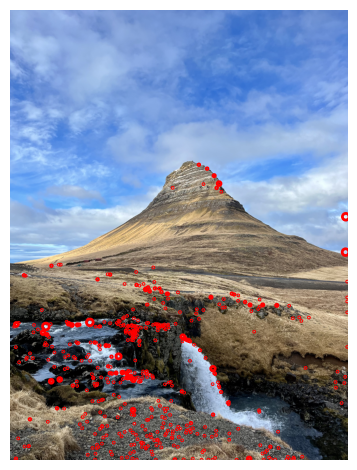

In [21]:
# prompt: do blob detection on an image named icelandsaveimage

import matplotlib.pyplot as plt
from skimage.feature import blob_doh

# Load the image (assuming icelandsaveimage is already loaded)
image = iceland_image_gray  # Use the grayscale version for blob detection

# Detect blobs using the Determinant of Hessian (DoH) method
blobs_doh = blob_doh(image, max_sigma=30, threshold=.01)

# Convert the blob coordinates and radii to integers
blobs_doh[:, :] = blobs_doh[:, :].astype(int)

# Display the results (optional)
fig, ax = plt.subplots(1, 1)
ax.imshow(icelandsaveimage, cmap='gray') # Display on the original image

for blob in blobs_doh:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
    ax.add_patch(c)

ax.set_axis_off()
plt.tight_layout()
plt.show()

This example was chosen to demonstrate feature detection using keypoint-based methods, highlighting the structural and textural elements in a natural landscape. By implementing this technique, I gained insights into how algorithms such as SIFT, ORB, or FAST can identify distinct points of interest, particularly along edges, high-contrast regions, and unique patterns. This approach is valuable for applications in geospatial analysis, terrain modeling, and remote sensing, where detecting key features in topographic images can aid in landscape classification, change detection, and automated mapping.

**Example 5: Piecewise Affine Transformation**

In [ ]:
from skimage.transform import PiecewiseAffineTransform, warp

# Define source and destination points for the transformation
rows, cols = lakesaveimage.shape[:2]
src_cols = np.linspace(0, cols, 20)
src_rows = np.linspace(0, rows, 10)
src_rows, src_cols = np.meshgrid(src_rows, src_cols)
src = np.dstack([src_cols.flat, src_rows.flat])[0]

# Create a slightly distorted destination grid
dest_cols = src[:, 0] + np.random.normal(0, 5, src.shape[0])  # Adjust the standard deviation for distortion
dest_rows = src[:, 1] + np.random.normal(0, 5, src.shape[0])
dest = np.dstack([dest_cols, dest_rows])[0]

# Create the piecewise affine transformation
tform = PiecewiseAffineTransform()
tform.estimate(src, dest)

# Apply the transformation to the image
warped_image = warp(lakesaveimage, tform)

# Display the original and warped images
show_images([lakesaveimage, warped_image], ['Original Image', 'Warped Image'])


This example was chosen to illustrate the effects of image warping, which is commonly used in remote sensing, GIS, and geospatial analysis to correct distortions or align images with a reference coordinate system. By implementing this transformation, I gained insights into how subtle spatial adjustments can be made while preserving key features. This approach is particularly useful for analyzing ice dynamics, glacial calving events, and surface changes over time, as it helps in accurate comparison and monitoring of ice structures in satellite or aerial imagery.